<a href="https://colab.research.google.com/github/Ogutierreze/First_Probabiliy_example/blob/main/Primer_Parcial_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## **Dashboard**

In [34]:
!pip install streamlit pyngrok --quiet


In [40]:
!ngrok config add-authtoken 2xWcKWlPgoOi7LvXKYLFdtI6LMj_4LVnLhWZamwtN2n5b7eyD


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [96]:
codigo = '''
# dashboard_colab.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(layout='wide')

# === Funciones de preprocesamiento ===
def cargar_datos(ruta):
    df = pd.read_csv(ruta)
    st.write(f"üìä Dimensiones iniciales del DataFrame: {df.shape}")
    return df

def eliminar_columnas_con_muchos_nulos(df, umbral=0.7):
    porcentaje_no_nulos = df.notnull().mean()
    columnas_a_conservar = porcentaje_no_nulos[porcentaje_no_nulos >= umbral].index.tolist()
    columnas_a_eliminar = porcentaje_no_nulos[porcentaje_no_nulos < umbral].index.tolist()
    df_filtrado = df[columnas_a_conservar]
    st.write(f"üóëÔ∏è Columnas eliminadas: {len(columnas_a_eliminar)}")
    return df_filtrado

def eliminar_filas_con_muchos_nulos(df, max_nulos=15):
    df_filtrado = df[df.isnull().sum(axis=1) <= max_nulos].reset_index(drop=True)
    st.write(f"‚úÖ Filas despu√©s de eliminar por nulos: {df_filtrado.shape[0]}")
    return df_filtrado

def eliminar_variables_numericas_poca_correlacion(df, variable_objetivo='SalePrice', umbral=0.04):
    columnas_categoricas_obj = df.select_dtypes(include=['object', 'category']).columns.tolist()
    columnas_numericas_categoricas = [col for col in ['MS SubClass', 'Mo Sold', 'Yr Sold'] if col in df.columns]
    columnas_cualitativas = list(set(columnas_categoricas_obj + columnas_numericas_categoricas))
    columnas_numericas_reales = [col for col in df.select_dtypes(include=['number']).columns if col not in columnas_numericas_categoricas]
    correlaciones = df[columnas_numericas_reales].corr()[variable_objetivo].abs()
    columnas_conservar = correlaciones[correlaciones >= umbral].index.tolist()
    columnas_a_conservar = list(set(columnas_conservar + columnas_cualitativas))
    df_filtrado = df[columnas_a_conservar].copy()
    st.write(f"üìê Columnas conservadas por correlaci√≥n >= {umbral}: {len(columnas_conservar)}")
    return df_filtrado

def imputar_datos(df):
    df_imputado = df.copy()
    columnas_con_nulos = df.columns[df.isnull().any()].tolist()
    columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    for col in [c for c in columnas_numericas if c in columnas_con_nulos]:
        if abs(df[col].skew()) > 1:
            df_imputado[col] = df[col].fillna(df[col].median())
        else:
            df_imputado[col] = df[col].fillna(df[col].mean())
    for col in [c for c in columnas_categoricas if c in columnas_con_nulos]:
        moda = df[col].mode(dropna=True)
        if not moda.empty:
            df_imputado[col] = df[col].fillna(moda[0])
    return df_imputado

def mostrar_matriz_correlacion_numerica(df):
    df_num = df.select_dtypes(include=['number'])
    corr = df_num.corr()
    fig, ax = plt.subplots(figsize=(20, 12))
    sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", square=True, ax=ax)
    ax.set_title("üîó Matriz de Correlaci√≥n entre Variables Num√©ricas", fontsize=16)
    st.pyplot(fig)

def mostrar_matriz_dispersion(df):
    variables = ['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Garage Area', 'Mo Sold']
    columnas_presentes = [var for var in variables if var in df.columns]
    if len(columnas_presentes) >= 2:
        fig = sns.pairplot(df[columnas_presentes], diag_kind='kde', plot_kws={'alpha': 0.6})
        st.pyplot(fig)
    else:
        st.warning("‚ö†Ô∏è No hay suficientes variables seleccionadas para crear la matriz de dispersi√≥n.")

# === Streamlit App ===
st.title("üîç Dashboard de Preprocesamiento y Modelado")

ruta = st.text_input("üìÅ Ruta al archivo CSV:", value="/content/drive/MyDrive/Audios_SenÃÉal/AmesHousing.csv")
if st.button("üì• Cargar y Preprocesar Datos"):
    df = cargar_datos(ruta)
    df = eliminar_columnas_con_muchos_nulos(df)
    df = eliminar_filas_con_muchos_nulos(df)
    df = eliminar_variables_numericas_poca_correlacion(df)
    df = imputar_datos(df)

    if 'PID' in df.columns:
        df = df.drop(columns=['PID'])

    st.subheader("üìã Vista previa del DataFrame")
    st.dataframe(df.head(20))

    st.subheader("üìä Matriz de Correlaci√≥n")
    mostrar_matriz_correlacion_numerica(df)

    st.subheader("üìà Matriz de Dispersi√≥n Seleccionada")
    mostrar_matriz_dispersion(df)

    # === Secci√≥n de visualizaci√≥n de resultados de modelos ===
    st.subheader("üñºÔ∏è Visualizaci√≥n de Resultados de Modelos")

    st.markdown("**üìå Imagen 1: Tabla de m√©tricas de desempe√±o (KernelRidge y Random Forest)**")
    url_img1 = st.text_input("üîó Enlace p√∫blico de Google Drive para la Imagen 1 (tabla)",
        value="https://drive.google.com/uc?export=view&id=1-FdoBHMCoKgrYplPIhxYa5LmFvYU1D-M")
    st.image(url_img1, caption="M√©tricas de Desempe√±o", use_container_width=True)

    st.markdown("**üìå Imagen 2: Gr√°fica de MAE (Top 3 modelos)**")
    url_img2 = st.text_input("üîó Enlace p√∫blico de Google Drive para la Imagen 2 (gr√°fica)",
        value="https://drive.google.com/uc?export=view&id=1_FPu0VmVA_OGTsX4yuFvE4stbHe5vg_C")
    st.image(url_img2, caption="Gr√°fica de MAE", use_container_width=True)

    st.markdown("**üìå Imagen 3: Gr√°fica Predicci√≥n vs Valor Real**")
    url_img3 = st.text_input("üîó Enlace p√∫blico de Google Drive para la Imagen 3 (predicci√≥n vs real)",
        value="https://drive.google.com/uc?export=view&id=19FJE-A5LAtegBziFgDdl1XgqW4B0CVFB")
    st.image(url_img3, caption="Predicci√≥n vs Valor Real", use_container_width=True)
'''

with open("dashboard_colab.py", "w") as f:
    f.write(codigo)


In [97]:
from pyngrok import ngrok
ngrok.kill()  # Cierra todos los t√∫neles abiertos en esta sesi√≥n


In [98]:
from pyngrok import ngrok
import threading
import time
import os

# Usar configuraci√≥n moderna compatible con ngrok v3
public_url = ngrok.connect(addr="8501", proto="http")
print(f"üåê Accede a tu dashboard aqu√≠: {public_url}")

# Ejecutar Streamlit
def run():
    os.system("streamlit run dashboard_colab.py")

thread = threading.Thread(target=run)
thread.start()
time.sleep(5)


üåê Accede a tu dashboard aqu√≠: NgrokTunnel: "https://542c-35-187-149-64.ngrok-free.app" -> "http://localhost:8501"


## üìÇ Carga y limpieza inicial del conjunto de datos Ames Housing

Esta celda define funciones para realizar el preprocesamiento inicial del dataset:
- `cargar_datos`: carga el archivo CSV desde la ruta especificada.
- `eliminar_columnas_con_muchos_nulos`: elimina columnas con m√°s de un 30% de valores nulos (ajustable con `umbral`).
- `eliminar_filas_con_muchos_nulos`: elimina filas con m√°s de 15 valores nulos (ajustable con `max_nulos`).
- `preprocesar_datos`: ejecuta en secuencia todo el preprocesamiento sobre el CSV de Ames Housing.

üìå Este paso asegura que el an√°lisis posterior se realice sobre un conjunto de datos limpio y confiable.


In [45]:
import pandas as pd

def cargar_datos(ruta):
    df = pd.read_csv(ruta)
    print(f"üìä Dimensiones iniciales del DataFrame: {df.shape}")
    return df

def eliminar_columnas_con_muchos_nulos(df, umbral=0.7):
    porcentaje_no_nulos = df.notnull().mean()
    columnas_a_conservar = porcentaje_no_nulos[porcentaje_no_nulos >= umbral].index.tolist()
    columnas_a_eliminar = porcentaje_no_nulos[porcentaje_no_nulos < umbral].index.tolist()

    df_filtrado = df[columnas_a_conservar]

    print(f"üîç Columnas eliminadas por tener m√°s del {int((1 - umbral)*100)}% de valores nulos: {len(columnas_a_eliminar)}")
    if columnas_a_eliminar:
        print("üóëÔ∏è Nombres de las columnas eliminadas:")
        for col in columnas_a_eliminar:
            print(f" - {col}")

    return df_filtrado, columnas_a_eliminar

def eliminar_filas_con_muchos_nulos(df, max_nulos=15):
    filas_iniciales = df.shape[0]
    df_filtrado = df[df.isnull().sum(axis=1) <= max_nulos].reset_index(drop=True)
    filas_eliminadas = filas_iniciales - df_filtrado.shape[0]

    print(f"üóëÔ∏è Filas eliminadas por tener m√°s de {max_nulos} valores nulos: {filas_eliminadas}")
    print(f"‚úÖ Filas restantes en el DataFrame: {df_filtrado.shape[0]}")
    return df_filtrado

def preprocesar_datos(ruta_csv, umbral_columnas=0.7, max_nulos_fila=15):
    df = cargar_datos(ruta_csv)
    df, _ = eliminar_columnas_con_muchos_nulos(df, umbral=umbral_columnas)
    df = eliminar_filas_con_muchos_nulos(df, max_nulos=max_nulos_fila)
    return df

# ==== Ejecuci√≥n ====
ruta = '/content/drive/MyDrive/Audios_SenÃÉal/AmesHousing.csv'
df = preprocesar_datos(ruta)


üìä Dimensiones iniciales del DataFrame: (2930, 82)
üîç Columnas eliminadas por tener m√°s del 30% de valores nulos: 6
üóëÔ∏è Nombres de las columnas eliminadas:
 - Alley
 - Mas Vnr Type
 - Fireplace Qu
 - Pool QC
 - Fence
 - Misc Feature
üóëÔ∏è Filas eliminadas por tener m√°s de 15 valores nulos: 0
‚úÖ Filas restantes en el DataFrame: 2930


## üßÆ Selecci√≥n de variables num√©ricas con correlaci√≥n relevante

Esta celda elimina variables num√©ricas que tienen baja correlaci√≥n con la variable objetivo `SalePrice`.  
El proceso:
- Conserva todas las variables categ√≥ricas, incluso si est√°n codificadas como n√∫meros (`MS SubClass`, `Mo Sold`, `Yr Sold`).
- Calcula la correlaci√≥n absoluta entre cada variable num√©rica y la variable objetivo.
- Elimina las columnas num√©ricas cuya correlaci√≥n sea menor al umbral definido (por defecto `0.04`).

üìå Este paso reduce la dimensionalidad del conjunto de datos y mantiene solo las variables num√©ricas m√°s informativas para la predicci√≥n.


In [46]:
def eliminar_variables_numericas_poca_correlacion(df, variable_objetivo='SalePrice', umbral=0.04):
    """
    Elimina columnas num√©ricas con baja correlaci√≥n respecto a la variable objetivo.
    Conserva autom√°ticamente todas las columnas categ√≥ricas, incluyendo algunas codificadas como n√∫meros.

    Retorna:
    - df_filtrado: DataFrame con columnas relevantes
    - columnas_eliminadas: columnas num√©ricas descartadas
    """

    # === 1. Detectar columnas claramente categ√≥ricas (object, category)
    columnas_categoricas_obj = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # === 2. Definir columnas num√©ricas que deber√≠an tratarse como categ√≥ricas
    columnas_numericas_categoricas = [
        'MS SubClass', 'Mo Sold', 'Yr Sold'
    ]
    columnas_numericas_categoricas = [col for col in columnas_numericas_categoricas if col in df.columns]

    # === 3. Construir lista final de columnas cualitativas a conservar
    columnas_cualitativas = list(set(columnas_categoricas_obj + columnas_numericas_categoricas))

    # === 4. Separar num√©ricas excluyendo las categ√≥ricas reconocidas
    columnas_numericas_reales = [col for col in df.select_dtypes(include=['number']).columns if col not in columnas_numericas_categoricas]

    # === 5. Validar existencia de variable objetivo
    if variable_objetivo not in columnas_numericas_reales:
        raise ValueError(f"La columna '{variable_objetivo}' no est√° en las columnas num√©ricas reales.")

    # === 6. Calcular correlaciones
    correlaciones = df[columnas_numericas_reales].corr()[variable_objetivo].abs()
    columnas_conservar = correlaciones[correlaciones >= umbral].index.tolist()
    columnas_eliminadas = [col for col in columnas_numericas_reales if col not in columnas_conservar]

    # === 7. Conservar todas las categ√≥ricas + num√©ricas relevantes
    columnas_a_conservar = columnas_conservar + columnas_cualitativas
    columnas_a_conservar = list(set(columnas_a_conservar))  # evitar duplicados

    df_filtrado = df[columnas_a_conservar].copy()

    # === 8. Reporte
    print(f"üìà Umbral de correlaci√≥n m√≠nima: {umbral}")
    print(f"üî¢ Columnas num√©ricas evaluadas: {len(columnas_numericas_reales)}")
    print(f"‚úÖ Columnas num√©ricas conservadas: {len(columnas_conservar)}")
    print(f"üóëÔ∏è Columnas num√©ricas eliminadas: {len(columnas_eliminadas)}")
    print(f"üìê Dimensiones finales del DataFrame: {df_filtrado.shape}")

    return df_filtrado, columnas_eliminadas


df, columnas_eliminadas = eliminar_variables_numericas_poca_correlacion(df)



üìà Umbral de correlaci√≥n m√≠nima: 0.04
üî¢ Columnas num√©ricas evaluadas: 36
‚úÖ Columnas num√©ricas conservadas: 30
üóëÔ∏è Columnas num√©ricas eliminadas: 6
üìê Dimensiones finales del DataFrame: (2930, 70)


## üßº Imputaci√≥n de valores nulos seg√∫n tipo y distribuci√≥n

Esta celda define una funci√≥n para imputar valores faltantes (`NaN`) en el conjunto de datos `df`:

- üî¢ **Variables num√©ricas**:
  - Se calcula la asimetr√≠a (`skew`) de cada columna.
  - Si la asimetr√≠a es baja (|skew| ‚â§ 1), se imputa con la **media**.
  - Si es alta (|skew| > 1), se imputa con la **mediana**.
- üî† **Variables categ√≥ricas**:
  - Se imputan con la **moda** (valor m√°s frecuente).

üìå Esta estrategia de imputaci√≥n es robusta y adaptativa a la distribuci√≥n de los datos. Es crucial para evitar sesgos en modelos de regresi√≥n posteriores.


In [47]:
import pandas as pd
import numpy as np

def imputar_datos(df):
    """
    Imputa valores nulos en un DataFrame.
    - Columnas num√©ricas: con media o mediana seg√∫n asimetr√≠a.
    - Columnas categ√≥ricas: con moda.
    Retorna el DataFrame imputado y un resumen.
    """
    df_imputado = df.copy()

    # === 1. Identificar columnas con valores nulos
    columnas_con_nulos = df.columns[df.isnull().any()].tolist()
    print(f"üß™ Columnas con valores nulos: {len(columnas_con_nulos)}")

    # === 2. Separar por tipo de dato
    columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

    columnas_con_nulos_numericas = [col for col in columnas_numericas if col in columnas_con_nulos]
    columnas_con_nulos_categoricas = [col for col in columnas_categoricas if col in columnas_con_nulos]

    imputadas_media = []
    imputadas_mediana = []
    imputadas_moda = []

    # === 3. Imputar variables num√©ricas
    for col in columnas_con_nulos_numericas:
        # Calcular asimetr√≠a (skewness)
        skew = df[col].skew()
        if abs(skew) > 1:
            valor = df[col].median()
            imputadas_mediana.append(col)
        else:
            valor = df[col].mean()
            imputadas_media.append(col)
        df_imputado[col] = df[col].fillna(valor)

    # === 4. Imputar variables categ√≥ricas con moda
    for col in columnas_con_nulos_categoricas:
        moda = df[col].mode(dropna=True)
        if not moda.empty:
            df_imputado[col] = df[col].fillna(moda[0])
            imputadas_moda.append(col)

    # === 5. Reporte final
    print(f"üìä Variables num√©ricas imputadas con MEDIA: {len(imputadas_media)}")
    print(f"üìà Variables num√©ricas imputadas con MEDIANA: {len(imputadas_mediana)}")
    print(f"üî§ Variables categ√≥ricas imputadas con MODA: {len(imputadas_moda)}")

    return df_imputado


df = imputar_datos(df)


üß™ Columnas con valores nulos: 19
üìä Variables num√©ricas imputadas con MEDIA: 5
üìà Variables num√©ricas imputadas con MEDIANA: 4
üî§ Variables categ√≥ricas imputadas con MODA: 10


In [48]:
columnas_numericas = df.select_dtypes(include=['number']).columns
print(columnas_numericas)


Index(['Enclosed Porch', 'Year Built', 'Bsmt Full Bath', 'Full Bath',
       'Mas Vnr Area', 'Pool Area', 'Fireplaces', 'MS SubClass',
       'Overall Qual', 'PID', 'Gr Liv Area', '1st Flr SF', 'Screen Porch',
       'BsmtFin SF 1', 'SalePrice', 'Total Bsmt SF', '2nd Flr SF',
       'TotRms AbvGrd', 'Wood Deck SF', 'Kitchen AbvGr', 'Garage Cars',
       'Year Remod/Add', 'Overall Cond', 'Bsmt Unf SF', 'Lot Frontage',
       'Mo Sold', 'Yr Sold', 'Bedroom AbvGr', 'Garage Area', 'Open Porch SF',
       'Lot Area', 'Half Bath', 'Garage Yr Blt'],
      dtype='object')


## üßæ Exploraci√≥n interactiva del DataFrame preprocesado

Esta celda permite **explorar din√°micamente** el conjunto de datos `df` tras el preprocesamiento:

- Se elimina la columna `PID`, ya que es solo un identificador y no aporta valor al modelado.
- Se implementa una interfaz con `ipywidgets` que permite **desplazarse por bloques de 20 filas** usando un control deslizante (`slider`).
- Los datos se muestran en una tabla HTML con desplazamiento horizontal para una mejor visualizaci√≥n.

üìå Esta herramienta es √∫til para inspeccionar visualmente los valores despu√©s del proceso de limpieza e imputaci√≥n.



In [49]:
import pandas as pd
from IPython.display import display, HTML
import ipywidgets as widgets

df = df.drop(columns=['PID'])  # Eliminar PID antes del modelado

def mostrar_filas_scroll(inicio=0):
    fin = inicio + 20
    subset = df.iloc[inicio:fin]

    html = subset.to_html(max_rows=20)
    scroll_html = f'''
    <div style="overflow-x: auto; white-space: nowrap">
        {html}
    </div>
    '''
    display(HTML(scroll_html))

widgets.interact(mostrar_filas_scroll, inicio=widgets.IntSlider(min=0, max=max(len(df)-20, 1), step=1, value=0))


interactive(children=(IntSlider(value=0, description='inicio', max=2910), Output()), _dom_classes=('widget-int‚Ä¶

<function __main__.mostrar_filas_scroll(inicio=0)>

## üìâ Matriz de dispersi√≥n entre variables clave

Esta celda genera una **matriz de dispersi√≥n** (`pairplot`) para visualizar relaciones bivariadas entre variables seleccionadas del dataset Ames Housing:

- `SalePrice` (variable objetivo)
- `Gr Liv Area` (√°rea habitable sobre nivel)
- `Overall Qual` (calidad general de la vivienda)
- `Garage Area` (√°rea del garaje)
- `Mo Sold` (mes de venta)

üîπ Se usa `diag_kind='kde'` para mostrar la densidad univariada en la diagonal.  
üîπ La opacidad (`alpha=0.6`) ayuda a identificar la concentraci√≥n de puntos.

üìå Esta visualizaci√≥n es √∫til para detectar relaciones lineales o no lineales, as√≠ como posibles outliers o agrupamientos.


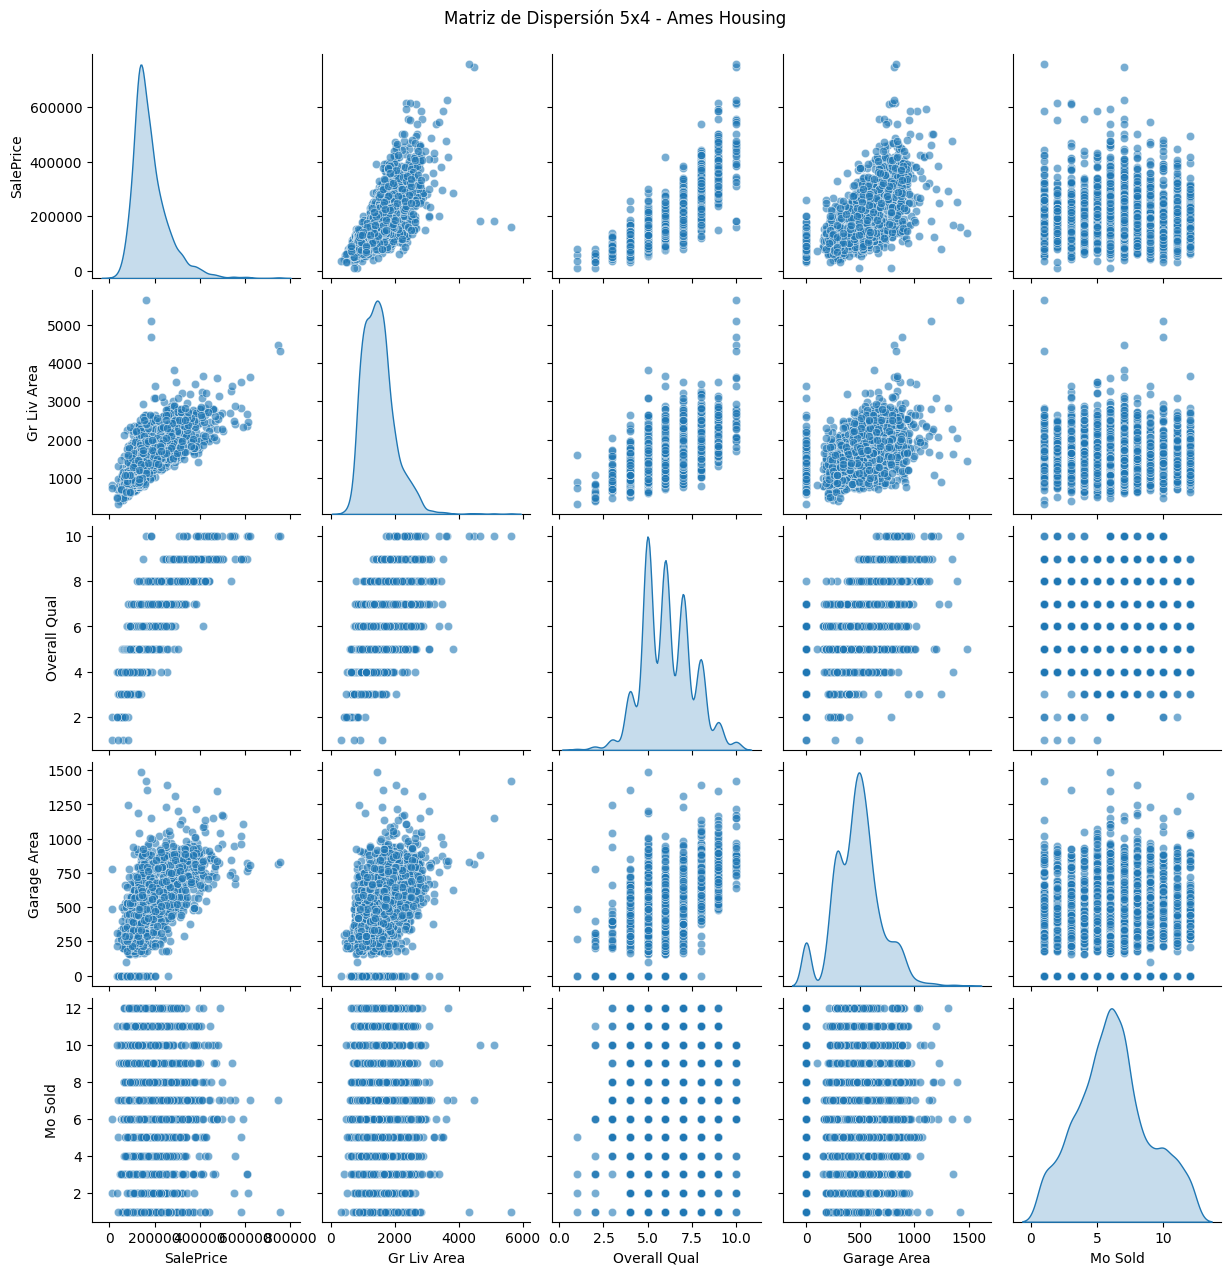

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables seleccionadas
variables = ['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Garage Area', 'Mo Sold']

# Crear la matriz de dispersi√≥n
sns.pairplot(df[variables], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Matriz de Dispersi√≥n 5x4 - Ames Housing', y=1.02)
plt.show()


## üîó Matriz de correlaci√≥n entre variables num√©ricas

Esta celda define una funci√≥n que calcula y visualiza la **matriz de correlaci√≥n** entre todas las variables num√©ricas del DataFrame `df`, utilizando un mapa de calor (`heatmap`):

- Se seleccionan autom√°ticamente solo las columnas de tipo num√©rico.
- La matriz muestra c√≥mo se correlacionan las variables entre s√≠ (coeficiente de Pearson).
- Se utiliza la paleta de colores `coolwarm` para distinguir visualmente correlaciones positivas y negativas.
- El par√°metro `anotar` permite opcionalmente mostrar los valores num√©ricos de correlaci√≥n dentro de cada celda.

üìå Esta visualizaci√≥n es clave para identificar variables redundantes o fuertemente relacionadas con la variable objetivo (`SalePrice`), lo cual es √∫til para selecci√≥n de caracter√≠sticas y reducci√≥n de dimensionalidad.


üìê Variables num√©ricas: 32
üßÆ Calculando matriz de correlaci√≥n...


<ipython-input-21-70922b8be34e>:24: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


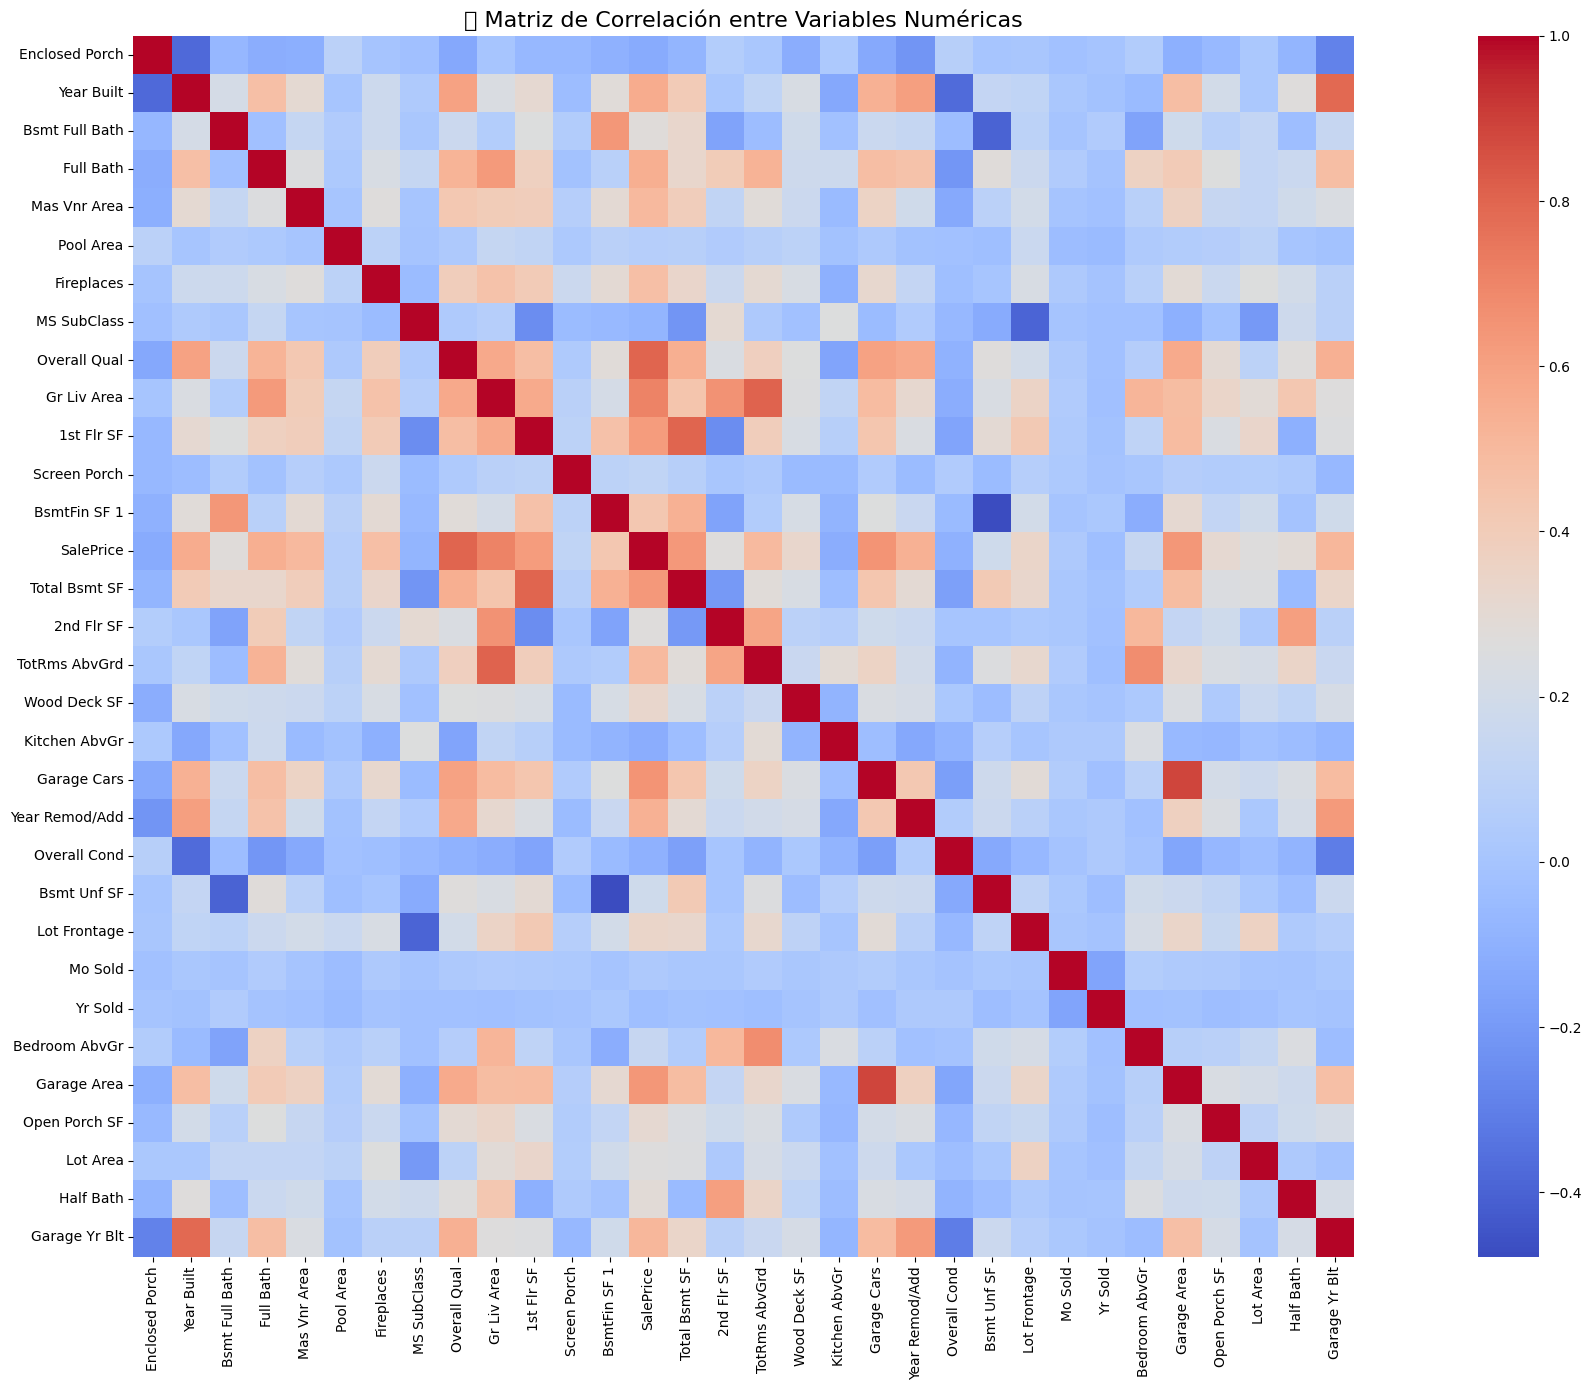

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def mostrar_matriz_correlacion_numerica(df, figsize=(25, 14), cmap='coolwarm', anotar=False):
    """
    Calcula y muestra la matriz de correlaci√≥n entre variables num√©ricas de un DataFrame.

    Par√°metros:
    - df: DataFrame original
    - figsize: tama√±o de la figura (por defecto 20x16)
    - cmap: paleta de colores (por defecto 'coolwarm')
    - anotar: si se deben mostrar los valores de correlaci√≥n en las celdas
    """
    df_num = df.select_dtypes(include=['number'])

    print(f"üìê Variables num√©ricas: {df_num.shape[1]}")
    print(f"üßÆ Calculando matriz de correlaci√≥n...")

    corr = df_num.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(corr, cmap=cmap, annot=anotar, fmt=".2f", square=True)
    plt.title("üîó Matriz de Correlaci√≥n entre Variables Num√©ricas", fontsize=16)
    plt.tight_layout()
    plt.show()

    return corr  # Opcional: retorna la matriz si la quieres usar despu√©s


matriz_corr = mostrar_matriz_correlacion_numerica(df)


## üî° Codificaci√≥n de variables cualitativas (ordinales y nominales)

Esta celda realiza la transformaci√≥n de variables categ√≥ricas a un formato num√©rico compatible con algoritmos de machine learning, siguiendo estos pasos:

### üîπ Paso 1: Eliminaci√≥n de columnas nominales con alta cardinalidad
Se eliminan las 5 variables nominales que presentan el mayor n√∫mero de categor√≠as distintas, ya que pueden generar una explosi√≥n de dimensionalidad al aplicar codificaci√≥n one-hot.

### üîπ Paso 2: Codificaci√≥n de variables ordinales
- Se utilizan mapas de orden predefinidos para 10 variables ordinales comunes en el dataset Ames Housing.
- Se emplea `OrdinalEncoder`, que convierte categor√≠as ordenadas en valores num√©ricos respetando la jerarqu√≠a sem√°ntica.

### üîπ Paso 3: Codificaci√≥n de variables nominales
- Se aplica `OneHotEncoder` con `drop='first'` para evitar colinealidad.
- La codificaci√≥n ignora categor√≠as desconocidas durante la predicci√≥n (`handle_unknown='ignore'`).

üìå Al finalizar, se retorna un DataFrame completamente num√©rico, listo para el entrenamiento de modelos. Adem√°s, se conserva la integridad de las columnas mediante reconstrucci√≥n expl√≠cita de los nombres.

‚úÖ Este paso es esencial para asegurar que los modelos de regresi√≥n interpreten correctamente la informaci√≥n cualitativa del dataset.


In [22]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


def eliminar_nominales_con_mas_valores(df, columnas_nominales, cantidad=5):
    """
    Elimina las columnas nominales que tienen mayor n√∫mero de categor√≠as distintas.

    Par√°metros:
    - df: DataFrame original
    - columnas_nominales: lista de columnas consideradas nominales
    - cantidad: cu√°ntas columnas eliminar (por defecto 5)

    Retorna:
    - df_filtrado: DataFrame sin las columnas eliminadas
    - columnas_eliminadas: lista de nombres de columnas eliminadas
    """
    # Filtrar solo las columnas que est√°n en el DataFrame
    columnas_presentes = [col for col in columnas_nominales if col in df.columns]

    # Calcular n√∫mero de categor√≠as distintas
    cardinalidades = df[columnas_presentes].nunique().sort_values(ascending=False)

    # Seleccionar las de mayor cardinalidad
    columnas_a_eliminar = cardinalidades.head(cantidad).index.tolist()

    # Eliminar columnas
    df_filtrado = df.drop(columns=columnas_a_eliminar)

    # Reporte
    print(f"üóëÔ∏è Columnas eliminadas por alta cardinalidad (m√°s categor√≠as):")
    for col in columnas_a_eliminar:
        print(f" - {col} ({cardinalidades[col]} categor√≠as)")

    return df_filtrado, columnas_a_eliminar


def codificar_variables(df,columnas_nominales):
    """
    Codifica variables ordinales y nominales, retornando un DataFrame num√©rico.
    Robusta frente a columnas faltantes o datos dispersos.
    """

    # === 1. Definir columnas originales ===
    columnas_ordinales = [
        'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'Heating QC', 'Kitchen Qual', 'Garage Qual', 'Garage Cond', 'Functional'
    ]


    # === 2. Mapas de orden para ordinales ===
    mapas_orden_original = [
        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],                         # Exter Qual
        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],                         # Exter Cond
        ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                   # Bsmt Qual
        ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                   # Bsmt Cond
        ['NA', 'No', 'Mn', 'Av', 'Gd'],                         # Bsmt Exposure
        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],                         # Heating QC
        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],                         # Kitchen Qual
        ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                   # Garage Qual
        ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                   # Garage Cond
        ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']  # Functional
    ]



    # === 3. Filtrar columnas que existen
    columnas_ordinales_existentes = [col for col in columnas_ordinales if col in df.columns]
    columnas_nominales_existentes = [col for col in columnas_nominales if col in df.columns]

    # === 4. Filtrar mapas de orden para columnas que existen
    mapas_dict = dict(zip(columnas_ordinales, mapas_orden_original))
    mapas_orden = [mapas_dict[col] for col in columnas_ordinales_existentes]
    columnas_ordinales = columnas_ordinales_existentes
    columnas_nominales = columnas_nominales_existentes

    print(f"üî¢ Ordinales a codificar: {len(columnas_ordinales)}")
    print(f"üî† Nominales a codificar: {len(columnas_nominales)}")

    # === 5. Preprocesamiento de ordinales
    df[columnas_ordinales] = df[columnas_ordinales].fillna('NA').astype(str)

    # === 6. Crear ColumnTransformer
    transformers = [('ordinal', OrdinalEncoder(categories=mapas_orden, handle_unknown='use_encoded_value', unknown_value=-1), columnas_ordinales)]
    if columnas_nominales:
        transformers.append(('nominal', OneHotEncoder(handle_unknown='ignore', drop='first'), columnas_nominales))

    preprocesador = ColumnTransformer(transformers=transformers, remainder='passthrough')

    # === 7. Aplicar transformaci√≥n
    X = preprocesador.fit_transform(df)

    # === 8. Convertir matriz dispersa a densa si es necesario
    if hasattr(X, 'toarray'):
        X = X.toarray()

    # === 9. Reconstrucci√≥n de nombres de columnas
    nombres_ordinales = columnas_ordinales
    nombres_nominales = preprocesador.named_transformers_['nominal'].get_feature_names_out(columnas_nominales) if columnas_nominales else []
    columnas_passthrough = [col for col in df.columns if col not in columnas_ordinales + columnas_nominales]
    columnas_finales = nombres_ordinales + list(nombres_nominales) + columnas_passthrough

    # === 10. Validar consistencia
    if X.shape[1] != len(columnas_finales):
        print(f"‚ùå Mismatch: X.shape = {X.shape[1]}, columnas = {len(columnas_finales)}")
        raise ValueError("Desajuste entre columnas codificadas y nombres reconstruidos.")

    # === 11. Crear DataFrame final
    df_codificado = pd.DataFrame(X, columns=columnas_finales)
    df_codificado = df_codificado.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtype == 'object' else col)

    # === 12. Reporte
    print(f"‚úÖ Codificaci√≥n completada.")
    print(f"üìê Dimensiones del DataFrame codificado: {df_codificado.shape}")
    print(f"üßÆ Columnas creadas por OneHotEncoder: {len(nombres_nominales)}")

    return df_codificado



# Luego codificar:

columnas_nominales = [
    'MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
    'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2',
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
    'Foundation', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical',
    'Garage Type', 'Garage Finish', 'Paved Drive', 'Sale Type', 'Sale Condition'
]

# Paso 1: eliminar las 5 columnas nominales con m√°s categor√≠as
df, columnas_eliminadas = eliminar_nominales_con_mas_valores(df, columnas_nominales, cantidad=5)

# Paso 2: actualizar la lista de columnas nominales
columnas_nominales_actualizadas = [col for col in columnas_nominales if col not in columnas_eliminadas]

# Paso 3: codificar
df = codificar_variables(df, columnas_nominales_actualizadas)



üóëÔ∏è Columnas eliminadas por alta cardinalidad (m√°s categor√≠as):
 - Neighborhood (28 categor√≠as)
 - Exterior 2nd (17 categor√≠as)
 - Exterior 1st (16 categor√≠as)
 - MS SubClass (16 categor√≠as)
 - Sale Type (10 categor√≠as)
üî¢ Ordinales a codificar: 10
üî† Nominales a codificar: 23
‚úÖ Codificaci√≥n completada.
üìê Dimensiones del DataFrame codificado: (2930, 139)
üßÆ Columnas creadas por OneHotEncoder: 98


## ‚öñÔ∏è Normalizaci√≥n de variables num√©ricas (Min-Max Scaling)

Esta celda implementa un pipeline para **normalizar** las variables num√©ricas del dataset mediante escalado Min-Max (`[0, 1]`), manteniendo la variable objetivo (`SalePrice`) intacta.

### üîπ Funciones incluidas:
- `separar_datos`: separa `X` (predictoras) e `y` (objetivo).
- `normalizar_datos`: aplica `MinMaxScaler` a todas las columnas num√©ricas, excepto aquellas especificadas para excluir.
- `reconstruir_dataframe`: reconstruye el DataFrame original combinando `X` normalizado e `y`.
- `aplicar_normalizacion`: ejecuta todo el pipeline.

üìå La normalizaci√≥n mejora la estabilidad num√©rica y el desempe√±o de muchos modelos de regresi√≥n al llevar todas las variables al mismo rango de escala.


In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def separar_datos(df, target_col='SalePrice'):
    """
    Separa el DataFrame en variables predictoras y objetivo.
    """
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return X, y

def normalizar_datos(X, columnas_excluir=[]):
    """
    Aplica Min-Max scaling a todas las columnas num√©ricas de X,
    excepto las especificadas en columnas_excluir.
    """
    # Seleccionar columnas num√©ricas
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col not in columnas_excluir]

    # Aplicar MinMaxScaler
    scaler = MinMaxScaler()
    X_scaled = X.copy()
    X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

    # Mensaje informativo
    print("‚úÖ Normalizaci√≥n completada exitosamente.")
    print(f"üìä Total de columnas normalizadas: {len(numeric_cols)}")
    print(f"üìã Columnas normalizadas: {numeric_cols}")



    return X_scaled, scaler, numeric_cols

def reconstruir_dataframe(X_scaled, y):
    """
    Reconstruye el DataFrame final combinando X escalado y la variable objetivo.
    """
    return pd.concat([X_scaled, y], axis=1)

# === Ejecuci√≥n principal (pipeline de normalizaci√≥n) ===
def aplicar_normalizacion(df, target_col='SalePrice'):
    X, y = separar_datos(df, target_col)
    X_scaled, scaler, columnas_normalizadas = normalizar_datos(X)
    df_final = reconstruir_dataframe(X_scaled, y)
    return df_final, scaler, columnas_normalizadas

# === Uso ===
# df es tu DataFrame original preprocesado
df, scaler_obj, columnas_normalizadas = aplicar_normalizacion(df)


‚úÖ Normalizaci√≥n completada exitosamente.
üìä Total de columnas normalizadas: 138
üìã Columnas normalizadas: ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'Heating QC', 'Kitchen Qual', 'Garage Qual', 'Garage Cond', 'Functional', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Pave', 'Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg', 'Land Contour_HLS', 'Land Contour_Low', 'Land Contour_Lvl', 'Utilities_NoSeWa', 'Utilities_NoSewr', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Land Slope_Mod', 'Land Slope_Sev', 'Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_PosA', 'Condition 1_PosN', 'Condition 1_RRAe', 'Condition 1_RRAn', 'Condition 1_RRNe', 'Condition 1_RRNn', 'Condition 2_Feedr', 'Condition 2_Norm', 'Condition 2_PosA', 'Condition 2_PosN', 'Condition 2_RRAe', 'Condition 2_RRAn', 'Condition 2_RRNn', 'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_T

In [24]:
import pandas as pd
from IPython.display import display, HTML
import ipywidgets as widgets




def mostrar_filas_scroll(inicio=0):
    fin = inicio + 20
    subset = df.iloc[inicio:fin]

    html = subset.to_html(max_rows=20)
    scroll_html = f'''
    <div style="overflow-x: auto; white-space: nowrap">
        {html}
    </div>
    '''
    display(HTML(scroll_html))

widgets.interact(mostrar_filas_scroll, inicio=widgets.IntSlider(min=0, max=max(len(df)-20, 1), step=1, value=0))

interactive(children=(IntSlider(value=0, description='inicio', max=2910), Output()), _dom_classes=('widget-int‚Ä¶

<function __main__.mostrar_filas_scroll(inicio=0)>

## ‚úÇÔ∏è Divisi√≥n del conjunto de datos en entrenamiento y prueba

Esta celda divide el DataFrame final en dos subconjuntos:

- `X_train` / `y_train`: conjunto de entrenamiento (80% por defecto).
- `X_test` / `y_test`: conjunto de prueba (20% por defecto).

Se utiliza la funci√≥n `train_test_split` de `sklearn.model_selection` con una semilla fija (`random_state=42`) para garantizar reproducibilidad.

üìå Esta divisi√≥n es fundamental para evaluar el desempe√±o real de los modelos en datos no vistos durante el entrenamiento.


In [25]:
from sklearn.model_selection import train_test_split

def dividir_entrenamiento_test(df, variable_objetivo='SalePrice', test_size=0.2, random_state=42):
    """
    Divide el DataFrame en conjuntos de entrenamiento y prueba.
    - X: variables predictoras
    - y: variable objetivo (por defecto 'SalePrice')

    Retorna: X_train, X_test, y_train, y_test
    """
    if variable_objetivo not in df.columns:
        raise ValueError(f"La variable objetivo '{variable_objetivo}' no se encuentra en el DataFrame.")

    X = df.drop(columns=[variable_objetivo])
    y = df[variable_objetivo]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    print(f"üìä Divisi√≥n completada:")
    print(f" - Entrenamiento: {X_train.shape[0]} filas")
    print(f" - Prueba:        {X_test.shape[0]} filas")

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = dividir_entrenamiento_test(df)



üìä Divisi√≥n completada:
 - Entrenamiento: 2344 filas
 - Prueba:        586 filas


In [14]:
!pip install scikit-optimize


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


## ü§ñ Evaluaci√≥n comparativa de modelos de regresi√≥n con optimizaci√≥n de hiperpar√°metros

Esta celda implementa un pipeline completo para comparar el rendimiento de varios modelos de regresi√≥n utilizando diferentes estrategias de b√∫squeda de hiperpar√°metros.

### üîπ Modelos evaluados:
- `LinearRegression`
- `Lasso`
- `ElasticNet`
- `KernelRidge`
- `SGDRegressor`

### üîπ M√©todos de b√∫squeda de hiperpar√°metros:
- `GridSearchCV`: b√∫squeda exhaustiva sobre una malla de valores.
- `RandomizedSearchCV`: b√∫squeda aleatoria sobre una distribuci√≥n.
- `BayesSearchCV`: b√∫squeda bayesiana basada en procesos gaussianos (usando `skopt`).

### üîπ M√©tricas calculadas (con validaci√≥n cruzada 5-fold):
- MAE (Error absoluto medio)
- MSE (Error cuadr√°tico medio)
- R¬≤ (Coeficiente de determinaci√≥n)
- MAPE (Error porcentual absoluto medio)

üìå El mejor estimador de cada combinaci√≥n modelo-m√©todo se eval√∫a con `cross_val_score`, y los resultados se formatean como `media ¬± desviaci√≥n est√°ndar`.

‚úÖ Esta secci√≥n es clave para identificar el modelo con mejor rendimiento predictivo antes de pasar a visualizaciones o ensamblado de modelos.


In [26]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from scipy.stats import uniform

# Validaci√≥n cruzada y m√©tricas
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorers = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score),
    'MAPE': make_scorer(mean_absolute_percentage_error)
}

# Crear pipeline
def crear_pipeline(modelo):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('model', modelo)
    ])

# Evaluaci√≥n de m√©tricas
def evaluar_modelo_crossval(pipeline, X, y, modelo_nombre, metodo_nombre):
    resultados = {}
    for nombre, scorer in scorers.items():
        scores = cross_val_score(pipeline, X, y, scoring=scorer, cv=cv)
        resultados[nombre] = (scores.mean(), scores.std())
    return {'Modelo': modelo_nombre, 'M√©todo': metodo_nombre, **resultados}

# Buscar hiperpar√°metros
def buscar_hiperparametros(pipeline, metodo, espacio, X, y):
    if metodo == 'grid':
        buscador = GridSearchCV(pipeline, espacio, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    elif metodo == 'random':
        buscador = RandomizedSearchCV(pipeline, espacio, n_iter=20, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
    elif metodo == 'bayes':
        buscador = BayesSearchCV(pipeline, espacio, n_iter=20, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
    else:
        raise ValueError("M√©todo no reconocido")
    buscador.fit(X, y)
    return buscador.best_estimator_

# Procesamiento final de resultados
def procesar_resultados(df_resultados):
    df_limpio = df_resultados.copy()
    for col in ['MAE', 'MSE', 'R2', 'MAPE']:
        df_limpio[col] = df_limpio[col].apply(lambda x: f"{x[0]:.4f} ¬± {x[1]:.4f}")
    df_limpio['Modelo-M√©todo'] = df_limpio['Modelo'] + ' - ' + df_limpio['M√©todo']
    return df_limpio.set_index('Modelo-M√©todo')[['MAE', 'MSE', 'R2', 'MAPE']]

# Modelos
modelos = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(max_iter=10000),
    'ElasticNet': ElasticNet(max_iter=10000),
    'KernelRidge': KernelRidge(),
    'SGDRegressor': SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
}

# Espacios de hiperpar√°metros
espacios = {
    'Lasso': {
        'grid': {'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
        'random': {'model__alpha': uniform(0.0001, 10)},
        'bayes': {'model__alpha': Real(0.0001, 10.0, prior='log-uniform')}
    },
    'ElasticNet': {
        'grid': {
            'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
            'model__l1_ratio': [0.1, 0.5, 0.9]
        },
        'random': {
            'model__alpha': uniform(0.0001, 10),
            'model__l1_ratio': uniform(0.0, 1.0)
        },
        'bayes': {
            'model__alpha': Real(0.0001, 10.0, prior='log-uniform'),
            'model__l1_ratio': Real(0.0, 1.0)
        }
    },
    'KernelRidge': {
        'grid': {
            'model__alpha': [0.01, 0.1, 1.0],
            'model__gamma': [0.001, 0.01, 0.1],
            'model__kernel': ['rbf']
        },
        'random': {
            'model__alpha': uniform(0.01, 1),
            'model__gamma': uniform(0.001, 0.1),
            'model__kernel': ['rbf']
        },
        'bayes': {
            'model__alpha': Real(0.01, 1.0, prior='log-uniform'),
            'model__gamma': Real(0.001, 0.1, prior='log-uniform'),
            'model__kernel': Categorical(['rbf'])
        }
    },
    'SGDRegressor': {
        'grid': {'model__alpha': [0.0001, 0.001, 0.01], 'model__penalty': ['l2', 'l1']},
        'random': {'model__alpha': uniform(0.0001, 0.1), 'model__penalty': ['l2', 'l1', 'elasticnet']},
        'bayes': {'model__alpha': Real(0.0001, 0.1, prior='log-uniform'), 'model__penalty': Categorical(['l2', 'l1', 'elasticnet'])}
    },
    'LinearRegression': {
        'grid': {},
        'random': {},
        'bayes': {}
    }
}

# Evaluaci√≥n total
resultados_finales = []
for nombre_modelo, modelo in modelos.items():
    for metodo in ['grid', 'random', 'bayes']:
        if espacios[nombre_modelo][metodo] == {}:
            pipe = crear_pipeline(modelo)
            resultado = evaluar_modelo_crossval(pipe, X_train, y_train, nombre_modelo, metodo.capitalize())
        else:
            pipe = crear_pipeline(modelo)
            best_model = buscar_hiperparametros(pipe, metodo, espacios[nombre_modelo][metodo], X_train, y_train)
            resultado = evaluar_modelo_crossval(best_model, X_train, y_train, nombre_modelo, metodo.capitalize())
        resultados_finales.append(resultado)

# Mostrar resultados
df_resultados_modelos = pd.DataFrame(resultados_finales)
df_resultados_procesados = procesar_resultados(df_resultados_modelos)
display(df_resultados_procesados)


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0] before, using random point [0.08213972916549481]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0] before, using random point [0.3586900184022506]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0] before, using random point [0.0029908287628516612]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0] before, using random point [0.001331473198090532]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0] before, using random point [0.0001077137981970081]
  w

MAE  \
Modelo-M√©todo                                        
LinearRegression - Grid     19157.4174 ¬± 1557.6074   
LinearRegression - Random   19157.4174 ¬± 1557.6074   
LinearRegression - Bayes    19157.4174 ¬± 1557.6074   
Lasso - Grid                19104.6384 ¬± 1543.0119   
Lasso - Random              19105.6849 ¬± 1542.8241   
Lasso - Bayes               19104.6384 ¬± 1543.0119   
ElasticNet - Grid           18862.5133 ¬± 1262.1382   
ElasticNet - Random         18769.8791 ¬± 1226.3284   
ElasticNet - Bayes          18764.8851 ¬± 1212.3735   
KernelRidge - Grid          15607.0194 ¬± 1714.5557   
KernelRidge - Random        21973.9186 ¬± 1865.4126   
KernelRidge - Bayes         15437.4639 ¬± 1643.6850   
SGDRegressor - Grid        43700.2458 ¬± 10719.8442   
SGDRegressor - Random       23049.8135 ¬± 2638.0260   
SGDRegressor - Bayes        22915.0118 ¬± 2553.3837   

                                                           MSE  \
Modelo-M√©todo                                                    
LinearRegression - Grid       1368926206.0328 ¬± 771048263.7705   
LinearRegression - Random     1368926206.0328 ¬± 771048263.7705   
LinearRegression - Bayes      1368926206.0328 ¬± 771048263.7705   
Lasso - Grid                  1351204012.6504 ¬± 761557762.9155   
Lasso - Random                1351634080.3302 ¬± 761699681.9222   
Lasso - Bayes                 1351204012.6504 ¬± 761557762.9155   
ElasticNet - Grid             1075825605.2931 ¬± 657225545.5977   
ElasticNet - Random           1060068090.0522 ¬± 610108456.3714   
ElasticNet - Bayes            1055440914.3035 ¬± 590679586.1563   
KernelRidge - Grid             916134576.3429 ¬± 715958536.5075   
KernelRidge - Random          1961907114.5298 ¬± 527038356.3835   
KernelRidge - Bayes            868917214.8637 ¬± 617012283.9631   
SGDRegressor - Grid        13575454287.6960 ¬± 16273221979.2420   
SGDRegressor - Random        1980097196.5700 ¬± 1522190363.9273   
SGDRegressor - Bayes         1935368621.1586 ¬± 1472766684.9211   

                                         R2             MAPE  
Modelo-M√©todo                                                 
LinearRegression - Grid     0.7714 ¬± 0.1270  0.1173 ¬± 0.0102  
LinearRegression - Random   0.7714 ¬± 0.1270  0.1173 ¬± 0.0102  
LinearRegression - Bayes    0.7714 ¬± 0.1270  0.1173 ¬± 0.0102  
Lasso - Grid                0.7743 ¬± 0.1254  0.1166 ¬± 0.0096  
Lasso - Random              0.7742 ¬± 0.1254  0.1166 ¬± 0.0096  
Lasso - Bayes               0.7743 ¬± 0.1254  0.1166 ¬± 0.0096  
ElasticNet - Grid           0.8202 ¬± 0.1075  0.1130 ¬± 0.0088  
ElasticNet - Random         0.8228 ¬± 0.0996  0.1117 ¬± 0.0091  
ElasticNet - Bayes          0.8236 ¬± 0.0963  0.1114 ¬± 0.0093  
KernelRidge - Grid          0.8464 ¬± 0.1183  0.0944 ¬± 0.0119  
KernelRidge - Random        0.6690 ¬± 0.0925  0.1224 ¬± 0.0096  
KernelRidge - Bayes         0.8543 ¬± 0.1020  0.0923 ¬± 0.0118  
SGDRegressor - Grid        -1.2812 ¬± 2.6900  0.3760 ¬± 0.2227  
SGDRegressor - Random       0.6692 ¬± 0.2507  0.1644 ¬± 0.0593  
SGDRegressor - Bayes        0.6766 ¬± 0.2425  0.1629 ¬± 0.0579

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from scipy.stats import randint, uniform
from skopt.space import Real, Categorical, Integer

# Modelos a evaluar
modelos_rf_svr = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

# Espacios corregidos de hiperpar√°metros
espacios_rf_svr = {
    'RandomForest': {
        'grid': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [5, 10, None]
        },
        'random': {
            'model__n_estimators': randint(50, 150),        # <- randint de scipy.stats
            'model__max_depth': randint(3, 20)
        },
        'bayes': {
            'model__n_estimators': Integer(50, 150),
            'model__max_depth': Integer(3, 20)
        }
    },
    'SVR': {
        'grid': {
            'model__C': [0.1, 1, 10],
            'model__epsilon': [0.01, 0.1, 0.5],
            'model__gamma': ['scale', 'auto'],
            'model__kernel': ['rbf']
        },
        'random': {
            'model__C': uniform(0.1, 10),
            'model__epsilon': uniform(0.01, 0.5),
            'model__gamma': ['scale', 'auto'],
            'model__kernel': ['rbf']
        },
        'bayes': {
            'model__C': Real(0.1, 10.0, prior='log-uniform'),
            'model__epsilon': Real(0.01, 0.5),
            'model__gamma': Categorical(['scale', 'auto']),
            'model__kernel': Categorical(['rbf'])
        }
    }
}

# Evaluaci√≥n y recolecci√≥n de resultados
resultados_rf_svr = []
for nombre_modelo, modelo in modelos_rf_svr.items():
    for metodo in ['grid', 'random', 'bayes']:
        print(f"‚ñ∂ Evaluando {nombre_modelo} con {metodo} search...")
        pipe = crear_pipeline(modelo)
        espacio = espacios_rf_svr[nombre_modelo][metodo]
        if espacio == {}:
            best_model = pipe.fit(X_train, y_train)
        else:
            best_model = buscar_hiperparametros(pipe, metodo, espacio, X_train, y_train)
        resultado = evaluar_modelo_crossval(best_model, X_train, y_train, nombre_modelo, metodo.capitalize())
        resultados_rf_svr.append(resultado)

# Mostrar resultados
df_resultados_rf_svr = pd.DataFrame(resultados_rf_svr)
df_resultados_rf_svr_proc = procesar_resultados(df_resultados_rf_svr)
display(df_resultados_rf_svr_proc)


‚ñ∂ Evaluando RandomForest con grid search...
‚ñ∂ Evaluando RandomForest con random search...
‚ñ∂ Evaluando RandomForest con bayes search...


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(150)] before, using random point [np.int64(9), np.int64(72)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(150)] before, using random point [np.int64(8), np.int64(78)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(150)] before, using random point [np.int64(3), np.int64(55)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(150)] before, using random point [np.int64(16), np.int64(123)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: 

‚ñ∂ Evaluando SVR con grid search...
‚ñ∂ Evaluando SVR con random search...
‚ñ∂ Evaluando SVR con bayes search...


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.5, np.str_('auto'), np.str_('rbf')] before, using random point [7.131114275969269, 0.30768543030425943, 'scale', 'rbf']
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.01, np.str_('auto'), np.str_('rbf')] before, using random point [0.6447606416483206, 0.3607791030374851, 'auto', 'rbf']
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.01, np.str_('auto'), np.str_('rbf')] before, using random point [2.503355940667593, 0.07289935121514614, 'scale', 'rbf']
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.01, np.str_('auto'), np.str_('rbf')]

MAE  \
Modelo-M√©todo                                   
RandomForest - Grid    16239.4163 ¬± 1538.2916   
RandomForest - Random  16191.4880 ¬± 1455.4269   
RandomForest - Bayes   16136.1770 ¬± 1404.0260   
SVR - Grid             53624.4729 ¬± 2373.9778   
SVR - Random           53628.5598 ¬± 2373.9182   
SVR - Bayes            53624.4729 ¬± 2373.9778   

                                                    MSE                R2  \
Modelo-M√©todo                                                               
RandomForest - Grid     759088259.8486 ¬± 379489573.9048   0.8724 ¬± 0.0627   
RandomForest - Random   749681488.2894 ¬± 347022296.0396   0.8739 ¬± 0.0576   
RandomForest - Bayes    743631133.5760 ¬± 336421940.9685   0.8749 ¬± 0.0560   
SVR - Grid             6223188945.5191 ¬± 494222611.6812  -0.0471 ¬± 0.0156   
SVR - Random           6223959491.2286 ¬± 494195992.3863  -0.0473 ¬± 0.0156   
SVR - Bayes            6223188945.5191 ¬± 494222611.6812  -0.0471 ¬± 0.0156   

                                  MAPE  
Modelo-M√©todo                           
RandomForest - Grid    0.1012 ¬± 0.0132  
RandomForest - Random  0.1008 ¬± 0.0127  
RandomForest - Bayes   0.1004 ¬± 0.0123  
SVR - Grid             0.3150 ¬± 0.0171  
SVR - Random           0.3150 ¬± 0.0171  
SVR - Bayes            0.3150 ¬± 0.0171

In [56]:
# 1. Unir resultados en bruto
df_resultados_todos = pd.concat([df_resultados_modelos, df_resultados_rf_svr], ignore_index=True)

# 2. Procesar todos los resultados (formatear ¬± std, etc.)
df_resultados_todos_proc = procesar_resultados(df_resultados_todos)

# 3. Mostrar la tabla completa
display(df_resultados_todos_proc)


MAE  \
Modelo-M√©todo                                        
LinearRegression - Grid     19157.4174 ¬± 1557.6074   
LinearRegression - Random   19157.4174 ¬± 1557.6074   
LinearRegression - Bayes    19157.4174 ¬± 1557.6074   
Lasso - Grid                19104.6384 ¬± 1543.0119   
Lasso - Random              19105.6849 ¬± 1542.8241   
Lasso - Bayes               19104.6384 ¬± 1543.0119   
ElasticNet - Grid           18862.5133 ¬± 1262.1382   
ElasticNet - Random         18769.8791 ¬± 1226.3284   
ElasticNet - Bayes          18764.8851 ¬± 1212.3735   
KernelRidge - Grid          15607.0194 ¬± 1714.5557   
KernelRidge - Random        21973.9186 ¬± 1865.4126   
KernelRidge - Bayes         15437.4639 ¬± 1643.6850   
SGDRegressor - Grid        43700.2458 ¬± 10719.8442   
SGDRegressor - Random       23049.8135 ¬± 2638.0260   
SGDRegressor - Bayes        22915.0118 ¬± 2553.3837   
RandomForest - Grid         16239.4163 ¬± 1538.2916   
RandomForest - Random       16191.4880 ¬± 1455.4269   
RandomForest - Bayes        16136.1770 ¬± 1404.0260   
SVR - Grid                  53624.4729 ¬± 2373.9778   
SVR - Random                53628.5598 ¬± 2373.9182   
SVR - Bayes                 53624.4729 ¬± 2373.9778   

                                                           MSE  \
Modelo-M√©todo                                                    
LinearRegression - Grid       1368926206.0328 ¬± 771048263.7705   
LinearRegression - Random     1368926206.0328 ¬± 771048263.7705   
LinearRegression - Bayes      1368926206.0328 ¬± 771048263.7705   
Lasso - Grid                  1351204012.6504 ¬± 761557762.9155   
Lasso - Random                1351634080.3302 ¬± 761699681.9222   
Lasso - Bayes                 1351204012.6504 ¬± 761557762.9155   
ElasticNet - Grid             1075825605.2931 ¬± 657225545.5977   
ElasticNet - Random           1060068090.0522 ¬± 610108456.3714   
ElasticNet - Bayes            1055440914.3035 ¬± 590679586.1563   
KernelRidge - Grid             916134576.3429 ¬± 715958536.5075   
KernelRidge - Random          1961907114.5298 ¬± 527038356.3835   
KernelRidge - Bayes            868917214.8637 ¬± 617012283.9631   
SGDRegressor - Grid        13575454287.6960 ¬± 16273221979.2420   
SGDRegressor - Random        1980097196.5700 ¬± 1522190363.9273   
SGDRegressor - Bayes         1935368621.1586 ¬± 1472766684.9211   
RandomForest - Grid            759088259.8486 ¬± 379489573.9048   
RandomForest - Random          749681488.2894 ¬± 347022296.0396   
RandomForest - Bayes           743631133.5760 ¬± 336421940.9685   
SVR - Grid                    6223188945.5191 ¬± 494222611.6812   
SVR - Random                  6223959491.2286 ¬± 494195992.3863   
SVR - Bayes                   6223188945.5191 ¬± 494222611.6812   

                                         R2             MAPE  
Modelo-M√©todo                                                 
LinearRegression - Grid     0.7714 ¬± 0.1270  0.1173 ¬± 0.0102  
LinearRegression - Random   0.7714 ¬± 0.1270  0.1173 ¬± 0.0102  
LinearRegression - Bayes    0.7714 ¬± 0.1270  0.1173 ¬± 0.0102  
Lasso - Grid                0.7743 ¬± 0.1254  0.1166 ¬± 0.0096  
Lasso - Random              0.7742 ¬± 0.1254  0.1166 ¬± 0.0096  
Lasso - Bayes               0.7743 ¬± 0.1254  0.1166 ¬± 0.0096  
ElasticNet - Grid           0.8202 ¬± 0.1075  0.1130 ¬± 0.0088  
ElasticNet - Random         0.8228 ¬± 0.0996  0.1117 ¬± 0.0091  
ElasticNet - Bayes          0.8236 ¬± 0.0963  0.1114 ¬± 0.0093  
KernelRidge - Grid          0.8464 ¬± 0.1183  0.0944 ¬± 0.0119  
KernelRidge - Random        0.6690 ¬± 0.0925  0.1224 ¬± 0.0096  
KernelRidge - Bayes         0.8543 ¬± 0.1020  0.0923 ¬± 0.0118  
SGDRegressor - Grid        -1.2812 ¬± 2.6900  0.3760 ¬± 0.2227  
SGDRegressor - Random       0.6692 ¬± 0.2507  0.1644 ¬± 0.0593  
SGDRegressor - Bayes        0.6766 ¬± 0.2425  0.1629 ¬± 0.0579  
RandomForest - Grid         0.8724 ¬± 0.0627  0.1012 ¬± 0.0132  
RandomForest - Random       0.8739 ¬± 0.0576  0.1008 ¬± 0.0127  
RandomFor

In [68]:
# Paso 1: Combinar ambos resultados crudos
df_resultados_completo = pd.concat([df_resultados_modelos, df_resultados_rf_svr], ignore_index=True)

# Paso 2: Crear una columna auxiliar solo con el valor de MAE (sin desviaci√≥n est√°ndar)
df_resultados_completo['MAE_valor'] = df_resultados_completo['MAE'].apply(lambda x: x[0])

# Paso 3: Seleccionar la mejor fila por modelo (el que tenga menor MAE)
df_mejores_modelos = df_resultados_completo.loc[
    df_resultados_completo.groupby('Modelo')['MAE_valor'].idxmin()
].reset_index(drop=True)

# Paso 4: Procesar para mostrar en formato bonito (¬± std y nombre combinado)
df_mejores_modelos_proc = procesar_resultados(df_mejores_modelos)

# Paso 5: Mostrar tabla final
display(df_mejores_modelos_proc)


MAE  \
Modelo-M√©todo                                     
ElasticNet - Bayes       18764.8851 ¬± 1212.3735   
KernelRidge - Bayes      15437.4639 ¬± 1643.6850   
Lasso - Grid             19104.6384 ¬± 1543.0119   
LinearRegression - Grid  19157.4174 ¬± 1557.6074   
RandomForest - Bayes     16136.1770 ¬± 1404.0260   
SGDRegressor - Bayes     22915.0118 ¬± 2553.3837   
SVR - Grid               53624.4729 ¬± 2373.9778   

                                                       MSE                R2  \
Modelo-M√©todo                                                                  
ElasticNet - Bayes        1055440914.3035 ¬± 590679586.1563   0.8236 ¬± 0.0963   
KernelRidge - Bayes        868917214.8637 ¬± 617012283.9631   0.8543 ¬± 0.1020   
Lasso - Grid              1351204012.6504 ¬± 761557762.9155   0.7743 ¬± 0.1254   
LinearRegression - Grid   1368926206.0328 ¬± 771048263.7705   0.7714 ¬± 0.1270   
RandomForest - Bayes       743631133.5760 ¬± 336421940.9685   0.8749 ¬± 0.0560   
SGDRegressor - Bayes     1935368621.1586 ¬± 1472766684.9211   0.6766 ¬± 0.2425   
SVR - Grid                6223188945.5191 ¬± 494222611.6812  -0.0471 ¬± 0.0156   

                                    MAPE  
Modelo-M√©todo                             
ElasticNet - Bayes       0.1114 ¬± 0.0093  
KernelRidge - Bayes      0.0923 ¬± 0.0118  
Lasso - Grid             0.1166 ¬± 0.0096  
LinearRegression - Grid  0.1173 ¬± 0.0102  
RandomForest - Bayes     0.1004 ¬± 0.0123  
SGDRegressor - Bayes     0.1629 ¬± 0.0579  
SVR - Grid               0.3150 ¬± 0.0171

<Figure size 1000x500 with 0 Axes>

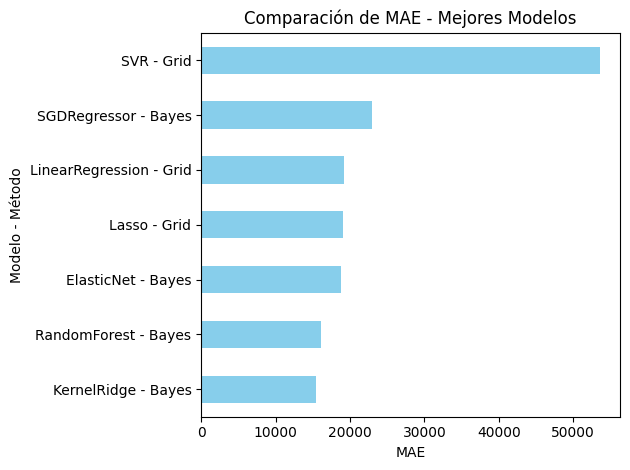

In [69]:
import matplotlib.pyplot as plt

# Extraer valores num√©ricos de las m√©tricas
df_plot = df_mejores_modelos.copy()
df_plot['Modelo-M√©todo'] = df_plot['Modelo'] + ' - ' + df_plot['M√©todo']
df_plot['MAE'] = df_plot['MAE'].apply(lambda x: x[0])
df_plot['MSE'] = df_plot['MSE'].apply(lambda x: x[0])
df_plot['R2'] = df_plot['R2'].apply(lambda x: x[0])
df_plot['MAPE'] = df_plot['MAPE'].apply(lambda x: x[0])

# Barplot MAE
plt.figure(figsize=(10, 5))
df_plot.sort_values(by='MAE', ascending=True).plot(
    x='Modelo-M√©todo', y='MAE', kind='barh', legend=False, color='skyblue')
plt.title('Comparaci√≥n de MAE - Mejores Modelos')
plt.xlabel('MAE')
plt.ylabel('Modelo - M√©todo')
plt.tight_layout()
plt.show()


In [76]:
# Paso 1: Combinar todos los resultados (si a√∫n no lo hiciste)
df_resultados_completo = pd.concat([df_resultados_modelos, df_resultados_rf_svr], ignore_index=True)

# Paso 2: Calcular la columna auxiliar con el valor medio del MAE
df_resultados_completo['MAE_valor'] = df_resultados_completo['MAE'].apply(lambda x: x[0])

# Paso 3: Tomar directamente los 3 mejores modelos globales (seg√∫n MAE m√°s bajo)
top3_modelos = df_resultados_completo.nsmallest(3, 'MAE_valor')

# Paso 4: Procesar para mostrar bonito (¬± std y nombre combinado)
top3_proc = procesar_resultados(top3_modelos)

# Paso 5: Mostrar la tabla
display(top3_proc)


MAE                              MSE  \
Modelo-M√©todo                                                                   
KernelRidge - Bayes   15437.4639 ¬± 1643.6850  868917214.8637 ¬± 617012283.9631   
KernelRidge - Grid    15607.0194 ¬± 1714.5557  916134576.3429 ¬± 715958536.5075   
RandomForest - Bayes  16136.1770 ¬± 1404.0260  743631133.5760 ¬± 336421940.9685   

                                   R2             MAPE  
Modelo-M√©todo                                           
KernelRidge - Bayes   0.8543 ¬± 0.1020  0.0923 ¬± 0.0118  
KernelRidge - Grid    0.8464 ¬± 0.1183  0.0944 ¬± 0.0119  
RandomForest - Bayes  0.8749 ¬± 0.0560  0.1004 ¬± 0.0123

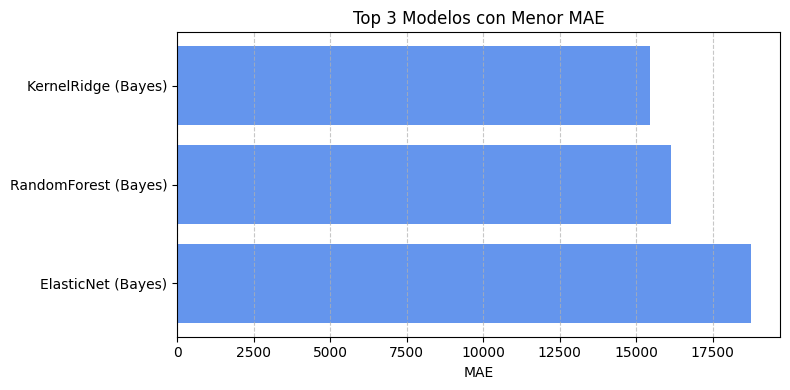

In [63]:
import matplotlib.pyplot as plt

# Aseg√∫rate de tener la columna 'MAE_valor' en df_mejores_modelos
# Si no la tienes, crea esta columna de nuevo
df_mejores_modelos['MAE_valor'] = df_mejores_modelos['MAE'].apply(lambda x: x[0])

# Seleccionar los 3 mejores modelos (menor MAE)
top3 = df_mejores_modelos.nsmallest(3, 'MAE_valor').copy()
top3['Modelo-M√©todo'] = top3['Modelo'] + ' (' + top3['M√©todo'] + ')'

# Graficar
plt.figure(figsize=(8, 4))
plt.barh(top3['Modelo-M√©todo'], top3['MAE_valor'], color='cornflowerblue')
plt.xlabel('MAE')
plt.title('Top 3 Modelos con Menor MAE')
plt.gca().invert_yaxis()  # El mejor arriba
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(150)] before, using random point [np.int64(9), np.int64(72)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(150)] before, using random point [np.int64(8), np.int64(78)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(150)] before, using random point [np.int64(3), np.int64(55)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(16), np.int64(150)] before, using random point [np.int64(16), np.int64(123)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: 

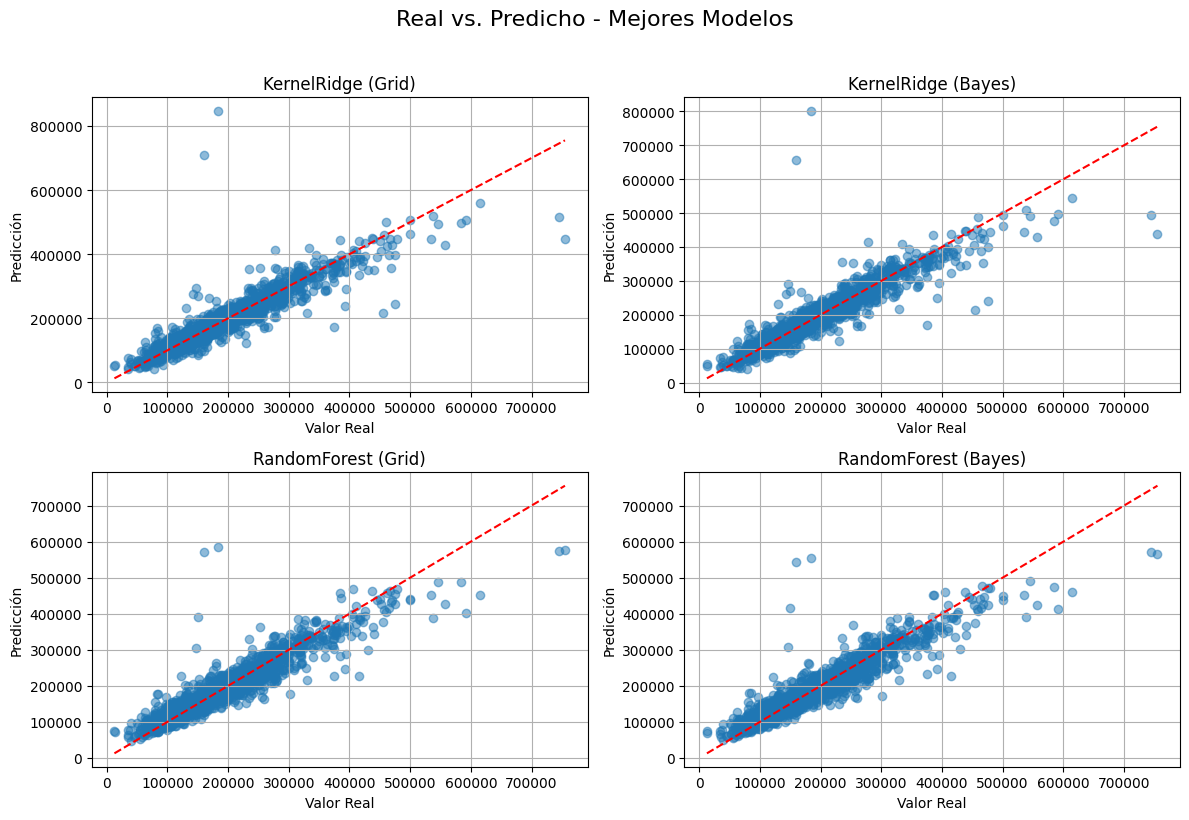

In [78]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Filtra solo los modelos que quieres graficar (top 3 ya los tienes)
modelos_top = df_resultados_completo.loc[
    df_resultados_completo['Modelo'].isin(['KernelRidge', 'RandomForest']) &
    df_resultados_completo['M√©todo'].isin(['Bayes', 'Grid'])
]

# Subplots
n = len(modelos_top)
ncols = 2
nrows = int(np.ceil(n / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

# Entrenar y graficar
for i, fila in enumerate(modelos_top.itertuples()):
    modelo_nombre = fila.Modelo
    metodo = fila.M√©todo.lower()

    # Obtener modelo base y espacio
    if modelo_nombre in modelos:
        base_model = modelos[modelo_nombre]
        espacio = espacios[modelo_nombre][metodo]
    else:
        base_model = modelos_rf_svr[modelo_nombre]
        espacio = espacios_rf_svr[modelo_nombre][metodo]

    # Pipeline y ajuste
    pipe = crear_pipeline(base_model)
    if espacio == {}:
        modelo_final = pipe.fit(X_train, y_train)
    else:
        modelo_final = buscar_hiperparametros(pipe, metodo, espacio, X_train, y_train)

    # cross_val_predict sobre entrenamiento
    y_pred = cross_val_predict(modelo_final, X_train, y_train, cv=cv, n_jobs=-1)

    # Plot
    ax = axes[i]
    ax.scatter(y_train, y_pred, alpha=0.5)
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    ax.set_title(f'{modelo_nombre} ({fila.M√©todo})')
    ax.set_xlabel('Valor Real')
    ax.set_ylabel('Predicci√≥n')
    ax.grid(True)

# Quitar subplots vac√≠os
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Real vs. Predicho - Mejores Modelos', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
